In [1]:
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt   
import seaborn as sns
from dotenv import load_dotenv
import os

load_dotenv()
db_url = os.getenv("DB_URL")

engine = create_engine(db_url)



In [2]:
query="""show tables 
"""
df=pd.read_sql(query,engine)
df



,Tables_in_olist_dw
0,dim_customers
1,dim_orders
2,dim_products
3,dim_sellers
4,fact_order_items
5,fact_order_payments
6,fact_order_reviews
7,staging_customers
8,staging_geolocation
9,staging_order_items


In [78]:
df_orders = pd.read_sql(
    "SELECT * FROM dim_orders",
    engine
) 
df_order_items = pd.read_sql(
    "SELECT * FROM fact_order_items",
    engine
) 
df_order_payments = pd.read_sql(
    "SELECT * FROM fact_order_payments",
    engine
) 
df_order_reviews = pd.read_sql(
    "SELECT * FROM fact_order_reviews",
    engine
) 
df_products=pd.read_sql(
    "SELECT * FROM dim_products",
    engine
)


In [85]:
df_customers=pd.read_sql("select * from dim_customers",engine)
	
df_sellers=pd.read_sql("select * from dim_sellers",engine)
df_customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,00012a2ce6f8dcda20d059ce98491703,248ffe10d632bebe4f7267f1f44844c9,06273,osasco,SP
1,000161a058600d5901f007fab4c27140,b0015e09bb4b6e47c52844fab5fb6638,35550,itapecerica,MG
2,0001fd6190edaaf884bcaf3d49edf079,94b11d37cd61cb2994a194d11f89682b,29830,nova venecia,ES
3,0002414f95344307404f0ace7a26f1d5,4893ad4ea28b2c5b3ddf4e82e79db9e6,39664,mendonca,MG
4,000379cdec625522490c315e70c7a9fb,0b83f73b19c2019e182fd552c048a22c,04841,sao paulo,SP


In [83]:
df_products.head()
df_customers.head()

,8
0,8
1,8
2,8
3,8
4,8


In [4]:
df_orders.head()
#df_orders.iloc[:,[1,2]]
#df_orders=df_orders[['order_id','customer_id']]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29
1,00018f77f2f0320c557190d7a144bdd3,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15
2,000229ec398224ef6ca0657da4fc703e,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05
3,00024acbcdf0a6daa1e931b038114c75,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20
4,00042b26cf59d7ce69dfabb4e55b4fd9,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17


In [86]:
df_order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [47]:
#df_orders.iloc[:,[1,2]]
df_orders=df_orders[['order_id','customer_id','order_purchase_timestamp','order_delivered_customer_date']]
df_order_items.rename(columns={'freight_value':'delivery_cost'},inplace=True)


#review table 
df_order_reviews=df_order_reviews[['order_id','review_score','review_creation_date']]

fact=pd.merge(df_orders,df_order_items,on='order_id')


fact.drop('shipping_limit_date',axis=1,inplace=True)
fact.head()


,order_id,customer_id,order_purchase_timestamp,order_delivered_customer_date,order_item_id,product_id,seller_id,price,delivery_cost
0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,2017-09-13 08:59:02,2017-09-20 23:43:48,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,f6dd3ec061db4e3987629fe6b26e5cce,2017-04-26 10:53:06,2017-05-12 16:04:24,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,6489ae5e4333f3693df5ad4372dab6d3,2018-01-14 14:33:31,2018-01-22 13:19:16,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,d4eb9395c8c0431ee92fce09860c5a06,2018-08-08 10:00:35,2018-08-14 13:32:39,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,58dbd0b2d70206bf40e62cd34e84d795,2017-02-04 13:57:51,2017-03-01 16:42:31,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,18.14


In [48]:
fact=pd.merge(fact,df_order_reviews,on='order_id')
fact.head()

,order_id,customer_id,order_purchase_timestamp,order_delivered_customer_date,order_item_id,product_id,seller_id,price,delivery_cost,review_score,review_creation_date
0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,2017-09-13 08:59:02,2017-09-20 23:43:48,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29,5,2017-09-21 00:00:00
1,00018f77f2f0320c557190d7a144bdd3,f6dd3ec061db4e3987629fe6b26e5cce,2017-04-26 10:53:06,2017-05-12 16:04:24,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93,4,2017-05-13 00:00:00
2,000229ec398224ef6ca0657da4fc703e,6489ae5e4333f3693df5ad4372dab6d3,2018-01-14 14:33:31,2018-01-22 13:19:16,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87,5,2018-01-23 00:00:00
3,00024acbcdf0a6daa1e931b038114c75,d4eb9395c8c0431ee92fce09860c5a06,2018-08-08 10:00:35,2018-08-14 13:32:39,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79,4,2018-08-15 00:00:00
4,00042b26cf59d7ce69dfabb4e55b4fd9,58dbd0b2d70206bf40e62cd34e84d795,2017-02-04 13:57:51,2017-03-01 16:42:31,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,18.14,5,2017-03-02 00:00:00


In [75]:
#fact['review'].isna().sum()
fact.dtypes

order_id                                  object
customer_id                               object
order_purchase_timestamp          datetime64[ns]
order_delivered_customer_date     datetime64[ns]
order_item_id                              int64
product_id                                object
seller_id                                 object
price                                    float64
delivery_cost                            float64
review_score                               int64
review_creation_date                      object
delivery time                    timedelta64[ns]
delivery_time                            float64
dtype: object

In [132]:
fact.describe()
#missing=fact['order_delivered_customer_date'].isna().sum()
#print(missing)
fact[fact['order_delivered_customer_date'].isna()]
fact['delivery_time']=fact['order_delivered_customer_date']-fact['order_purchase_timestamp']
#fact.head()
#(fact['order_delivered_customer_date'] - fact['order_purchase_timestamp']).isna().sum()


fact['delivery_time']=fact['delivery_time'].dt.total_seconds()/(84600)
fact['delivery_time']=(fact['delivery_time'].round(2))
fact.head()


,order_id,customer_id,order_purchase_timestamp,order_delivered_customer_date,order_item_id,product_id,seller_id,price,delivery_cost,review_score,review_creation_date,delivery time,delivery_time
0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,2017-09-13 08:59:02,2017-09-20 23:43:48,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29,5,2017-09-21 00:00:00,7.614421,7.78
1,00018f77f2f0320c557190d7a144bdd3,f6dd3ec061db4e3987629fe6b26e5cce,2017-04-26 10:53:06,2017-05-12 16:04:24,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93,4,2017-05-13 00:00:00,16.216181,16.56
2,000229ec398224ef6ca0657da4fc703e,6489ae5e4333f3693df5ad4372dab6d3,2018-01-14 14:33:31,2018-01-22 13:19:16,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87,5,2018-01-23 00:00:00,7.948437,8.12
3,00024acbcdf0a6daa1e931b038114c75,d4eb9395c8c0431ee92fce09860c5a06,2018-08-08 10:00:35,2018-08-14 13:32:39,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79,4,2018-08-15 00:00:00,6.147269,6.28
4,00042b26cf59d7ce69dfabb4e55b4fd9,58dbd0b2d70206bf40e62cd34e84d795,2017-02-04 13:57:51,2017-03-01 16:42:31,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,18.14,5,2017-03-02 00:00:00,25.114352,25.65


In [148]:
(fact['delivery time']>150).sum()
print(fact['delivery time']>150)
#fact['delivery time'].describe()
fact['delivery time']>150
fact_super_late = fact[fact['delivery_time'] > 150]
fact_super_late


0         False
1         False
2         False
3         False
4         False
          ...  
111455    False
111456    False
111457    False
111458    False
111459    False
Name: delivery time, Length: 111460, dtype: bool


,order_id,customer_id,order_purchase_timestamp,order_delivered_customer_date,order_item_id,product_id,seller_id,price,delivery_cost,review_score,review_creation_date,delivery time,delivery_time
1315,031e7d4e559a1bf08e71a419aa998d0a,aedfc62ab52a3e4ea642220ccdec91ff,2017-04-06 12:59:46,2017-09-19 16:23:52,1,fb1f078a066428f00c1d71d6b9df3ff8,eebb3372362aa9a46975164bed19a7e7,73.99,24.52,1,2017-05-13 00:00:00,166.141736,169.68
6687,0f4519c5f1c541ddec9f21b3bddd533a,1a8a4a30dc296976717f44e7801fdeef,2017-03-09 13:26:57,2017-09-19 14:38:21,1,e0d64dcfaa3b6db5c54ca298ae101d05,7e93a43ef30c4f03f38b393420bc753a,231.27,27.88,4,2017-03-29 00:00:00,194.049583,198.18
11882,1b3190b2dfa9d789e1f14c05b647a14a,d306426abe5fca15e54b645e4462dc7b,2018-02-23 14:57:35,2018-09-19 23:24:07,1,ee406bf28024d97771c4b1e8b7e8e219,7a67c85e85bb2ce8582c35f2203ad736,144.99,17.26,2,2018-03-17 00:00:00,208.351759,212.78
17433,285ab9426d6982034523a855f55a885e,9cf2c3fa2632cee748e1a59ca9d09b21,2017-03-08 22:47:40,2017-09-19 14:00:04,1,0c6fc9b9317a68d1cda098c063914b72,c847e075301870dd144a116762eaff9a,429.90,27.75,1,2017-04-08 00:00:00,194.633611,198.77
18809,2ba1366baecad3c3536f27546d129017,6852966131028b6696be63d0a1bd87ae,2017-02-28 14:56:37,2017-08-28 16:23:46,1,e4176515d2055eb7771645c597f8b40c,8b28d096634035667e8263d57ba3368c,34.90,17.78,1,2017-04-01 00:00:00,181.060521,184.91
19617,2d7561026d542c8dbd8f0daeadf67a43,8199345f57c6d1cbe9701f92481beb8d,2017-03-15 11:24:27,2017-09-19 14:38:18,1,7594c5fa74bceda1c2540003533a6e02,e83c76265fc54bf41eac728805e4da77,32.90,20.80,3,2017-04-14 00:00:00,188.134618,192.14
20625,2fa29503f2ebd9f53deba187160f3202,5c42637f3e7e7c520282ae5c4faab832,2017-03-31 15:03:51,2017-09-19 18:24:46,1,bf8f8dcc8811756c8dccbeea08223f96,1782ce2db72c3dda627d5e7c898104e1,236.00,30.85,5,2017-05-05 00:00:00,172.139525,175.80
20653,2fb597c2f772eca01b1f5c561bf6cc7b,217906bc11a32c1e470eb7e08584894b,2017-03-08 18:09:02,2017-09-19 14:33:17,1,8ed094bfe076c568f6bb10feada3f75d,a7f13822ceb966b076af67121f87b063,239.96,105.19,4,2017-04-05 00:00:00,194.850174,199.00
20735,2fe324febf907e3ea3f2aa9650869fa5,65b14237885b3972ebec28c0f7dd2220,2017-03-13 20:17:10,2017-09-19 17:00:07,1,b75683e29689c1a989ae97883e8cad56,df683dfda87bf71ac3fc63063fba369d,39.90,16.05,1,2017-04-09 00:00:00,189.863160,193.90
23195,3566eabb132f8d64741ae7b921bbd10e,bc34456d3b02a05a197c94f72ff6fde1,2017-03-29 13:57:55,2017-09-19 15:07:09,1,35afc973633aaeb6b877ff57b2793310,4a3ca9315b744ce9f8e9374361493884,89.90,25.12,3,2017-04-29 00:00:00,174.048079,177.75


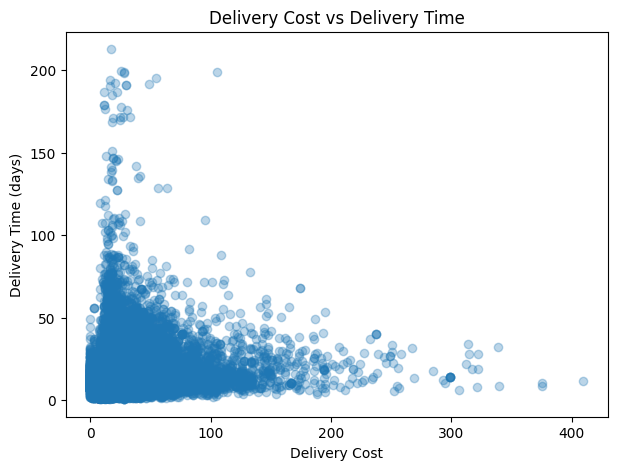

TypeError: Invalid comparison between dtype=timedelta64[ns] and int

In [ ]:
plt.figure(figsize=(7,5))
plt.scatter(fact['delivery_cost'], fact['delivery_time'], alpha=0.3)
plt.xlabel('Delivery Cost')
plt.ylabel('Delivery Time (days)')
plt.title('Delivery Cost vs Delivery Time')
plt.show()


In [9]:


#df_order_items.groupby(['seller_id'])['price'].count()
#df_order_items[df_order_items['seller_id'].isin(df_order_items.nlargest(5, 'price')['seller_id'])]
#df_order_items(['price'])
df_order_items[df_order_items['price']<=6000].sort_values(['price'],ascending=False).head(5)
#df_order_items.nlargest(5,'price')


#df_order_items.plot(kind='scatter',x='price',y='seller_id')

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,delivery_cost
74336,a96610ab360d42a2e5335a3998b4718a,1,a6492cc69376c469ab6f61d8f44de961,59417c56835dd8e2e72f91f809cd4092,2017-04-18 13:25:18,4799.00,151.34
11249,199af31afc78c699f0dbf71fb178d4d4,1,c3ed642d592594bb648ff4a04cee2747,59417c56835dd8e2e72f91f809cd4092,2017-05-09 15:50:15,4690.00,74.34
62086,8dbc85d1447242f3b127dda390d56e19,1,259037a6a41845e455183f89c5035f18,c72de06d72748d1a0dfb2125be43ba63,2018-06-28 12:36:36,4590.00,91.78
29193,426a9742b533fc6fed17d1fd6d143d7e,1,a1beef8f3992dbd4cd8726796aa69c53,512d298ac2a96d1931b6bd30aa21f61d,2018-08-16 14:24:28,4399.87,113.45
45843,68101694e5c5dc7330c91e1bbc36214f,1,6cdf8fc1d741c76586d8b6b15e9eef30,ed4acab38528488b65a9a9c603ff024a,2018-04-05 08:27:27,4099.99,75.27


In [10]:

# Filter for the seller
seller_df = df_order_items['seller_id']
3


3

In [11]:


df_order_payments.head()


,payment_id,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,1,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,2,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,3,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,4,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,5,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [12]:


df_order_reviews.head()

,order_id,review_score,review_creation_date
0,fc046d7776171871436844218f817d7d,5,2018-03-20 00:00:00
1,d4665434b01caa9dc3e3e78b3eb3593e,5,2018-06-22 00:00:00
2,e28abf2eb2f1fbcbdc2dd0cd9a561671,5,2018-04-25 00:00:00
3,04fb47576993a3cb0c12d4b25eab6e4e,5,2017-05-30 00:00:00
4,5f358d797a49fe2f24352f73426215f6,5,2017-08-12 00:00:00


In [13]:

df_orders = pd.read_sql(
    "SELECT * FROM dim_orders",
    engine
) 

df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29
1,00018f77f2f0320c557190d7a144bdd3,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15
2,000229ec398224ef6ca0657da4fc703e,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05
3,00024acbcdf0a6daa1e931b038114c75,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20
4,00042b26cf59d7ce69dfabb4e55b4fd9,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17


In [14]:


df_products.head()
df_products[df_products['product_id']=='489ae2aa008f021502940f251d4cce7f']


NameError: name 'df_products' is not defined